In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
import statsmodels.api as sm

In [2]:
!pip install kagglehub
# 이미설치된 라이브러리

In [3]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

Path to dataset files: C:\Users\dongu\.cache\kagglehub\datasets\tunguz\online-retail\versions\1


(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.drop(['InvoiceNo', 'StockCode'], axis= 1, inplace = True) #송장번호와 제품코드는 불필요해서 삭제


In [8]:
df.head()


,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [9]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [10]:
# 설명과 고객 아이디 널값제거
df.dropna(subset= ["Description", "CustomerID"], inplace = True)

In [11]:
df.duplicated().sum()

np.int64(5301)

In [12]:
df=df.drop_duplicates()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401528 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  401528 non-null  object 
 1   Quantity     401528 non-null  int64  
 2   InvoiceDate  401528 non-null  object 
 3   UnitPrice    401528 non-null  float64
 4   CustomerID   401528 non-null  float64
 5   Country      401528 non-null  object 
 6   TotalPrice   401528 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 24.5+ MB


In [14]:
df.isna().sum()

Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [15]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['InvoiceDate'].dtype

C:\Users\dongu\AppData\Local\Temp\ipykernel_13480\783915899.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


dtype('<M8[ns]')

In [16]:
# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

In [17]:
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12


In [18]:
# 수량과 단위당 가격에서 불합리한 가격 삭제
df = df[df["Quantity"] > 0]
df = df[df["UnitPrice"] > 0]
df = df[df["TotalPrice"] > 0]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392617 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Description   392617 non-null  object        
 1   Quantity      392617 non-null  int64         
 2   InvoiceDate   392617 non-null  datetime64[ns]
 3   UnitPrice     392617 non-null  float64       
 4   CustomerID    392617 non-null  float64       
 5   Country       392617 non-null  object        
 6   TotalPrice    392617 non-null  float64       
 7   DayOfWeek     392617 non-null  int32         
 8   InvoiceMonth  392617 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(2)
memory usage: 27.0+ MB


In [20]:
# 1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.
# 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
# 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.
# 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

In [21]:
# 모집단
population = df['TotalPrice']
population_mean = df['TotalPrice'].mean()
population_std = df['TotalPrice'].std()


In [22]:
# 표본: 무작위로 1000개 축출
sample = df['TotalPrice'].sample(n=1000, random_state=42)
sample_mean = sample.mean()
sample_std = sample.std()

In [23]:
print("모집단(Population)과 표본(Sample) 비교")
print(f"모집단 평균: {population_mean:.2f}, 표준편차: {population_std:.2f}")
print(f"표본 평균: {sample_mean:.2f}, 표준편차: {sample_std:.2f}")


모집단(Population)과 표본(Sample) 비교
모집단 평균: 22.63, 표준편차: 311.13
표본 평균: 24.13, 표준편차: 87.42


In [24]:
# 모집단과 샘플의 평균 차이는 1.50이며, 이는 큰차이가 없음을 의미함
# 하지만 정당성을 얻기 위해서는 p값을 구해서 이를 기준으로 판단해야 됨

In [25]:
# -- 중심극한정리를 적용한 해석 --
# 중심극한 정리의 정의는 모든 모집단은 무한히 큰 수인경우 표본은 정규분포(=벨모양)을 이룬다임
# 즉 표본(샘플)의 수가 커질 수록 모집단의 평균과 분산이 유사진다는 의미임
# 여기서 총가격에서 1천개의 샘플을 뽑을 경우(일반적으로 30이상이면 정규분포를 이룬다고 정의함)에 모집단과 표본집단은 유사한 정규분포를
# 보여줄 수 있으며, 상기의 분석에서 모집단과 표본의 평균이 499,79와 499.85를  보임으로 거의 동일하며, 다만 표준편차의 차이는 있으나
# 그 값 자체도 상당히 작기에 두 집단은 거의 일치하는 형태를 보임

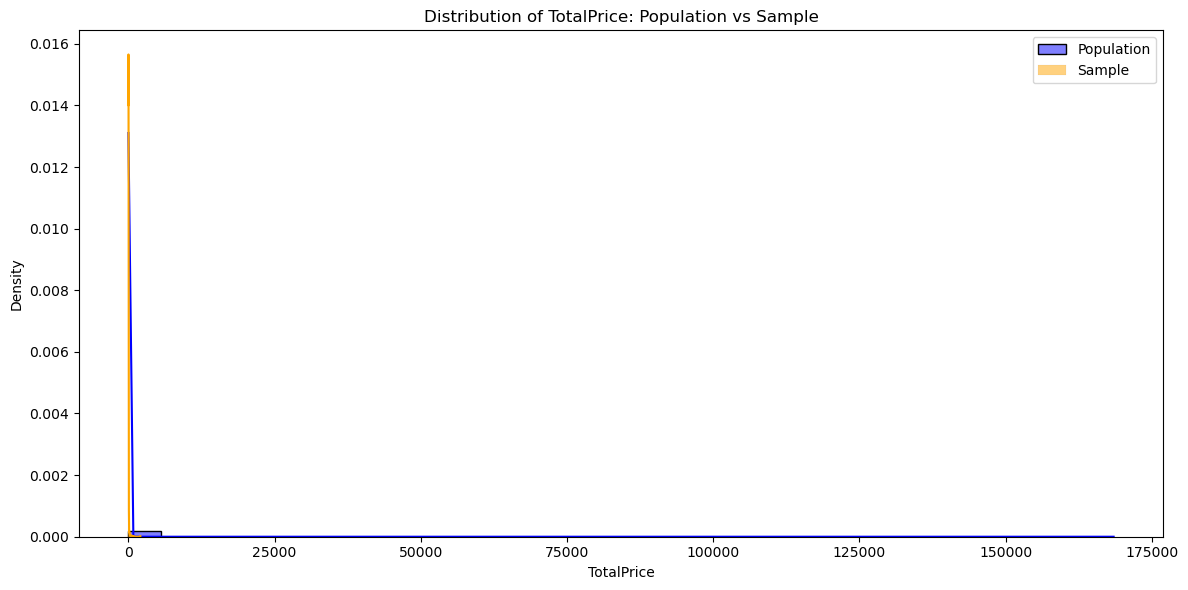

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(population, kde=True, color='blue', label='Population', stat="density", bins=30)
sns.histplot(sample, kde=True, color='orange', label='Sample', stat="density", bins=30)
plt.title('Distribution of TotalPrice: Population vs Sample')
plt.xlabel('TotalPrice')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


In [27]:
df['Log_TotalPrice'] = np.log1p(df['TotalPrice'])

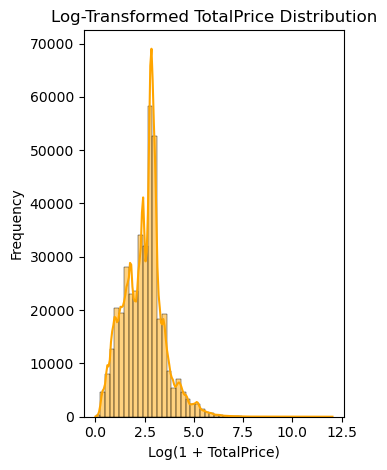

In [28]:
plt.subplot(1, 2, 2)
sns.histplot(df['Log_TotalPrice'], kde=True, color='orange', bins=50)
plt.title('Log-Transformed TotalPrice Distribution')
plt.xlabel('Log(1 + TotalPrice)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [29]:
# 가설의 설정

# H0 : 모집단과 표본의 평균은 같을 것이다.
# H1 : 모집단과 표본의 평균은 다를 것이다.

# t-test 수행
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(population, sample)

# 결과 출력
print("-- t-test 결과 --")
print(f"T-통계량: {t_stat:.4f}")
print(f"P 값: {p_value:.4f}")

-- t-test 결과 --
T-통계량: -0.1526
P 값: 0.8787


In [30]:
# 결과해석
# P값이 0.05보다 상대적으로 큼(0.8787)으로 H1울 채택할 수 없다.

In [31]:
# 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.
# 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
# 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.
# t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

In [32]:
# 상위 국가 선택
top_countries = df['Country'].value_counts()
top_countries


Country
United Kingdom          349131
Germany                   9024
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     602
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     244
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


In [33]:
# 상위 2개국 : 영국과 독일

In [34]:
# group1 = df[df['Country'] == top_countries[0]]['TotalPrice']
# group2 = df[df['Country'] == top_countries[1]]['TotalPrice']

# # t-검정 수행
# t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Welch's t-test 권장
# print(f"T-통계량: {t_stat:.4f}")
# print(f"P-값: {p_value:.4f}")
# print(f"Comparing '{top_countries[0]}' and '{top_countries[1]}'")
# print(f"T-statistic: {t_stat:.4f}")
# print(f"P-value: {p_value:.4e}")

In [35]:
country_counts = df['Country'].value_counts()
top_countries = country_counts.index.tolist()[:2]

In [36]:
group1 = df[df['Country'] == top_countries[0]]['TotalPrice']
group2 = df[df['Country'] == top_countries[1]]['TotalPrice']

In [37]:
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

In [38]:
print(f"두국가비교'{top_countries[0]}' and '{top_countries[1]}'")
print(f"t-test: {t_stat:.4f}")
print(f"P값: {p_value:.4e}")

두국가비교'United Kingdom' and 'Germany'
t-test: -6.6855
P값: 2.3155e-11


In [39]:
alpha = 0.05
print("\n--- 결과 해석 ---")
if p_value < alpha:
    print(f"P-값({p_value:.4e})이 유의수준({alpha})보다 작으므로, 귀무가설을 기각합니다.")
    print("두 국가의 'TotalPrice' 평균에는 통계적으로 유의미한 차이가 있습니다.")
else:
    print(f"P-값({p_value:.4e})이 유의수준({alpha})보다 크므로, 귀무가설을 기각하지 못합니다.")
    print("두 국가의 'TotalPrice' 평균에는 통계적으로 유의미한 차이가 없습니다.")


--- 결과 해석 ---
P-값(2.3155e-11)이 유의수준(0.05)보다 작으므로, 귀무가설을 기각합니다.
두 국가의 'TotalPrice' 평균에는 통계적으로 유의미한 차이가 있습니다.


In [40]:
# p값이 상당히 작은 값으로 0.05보다 작기 때문에 H1를 기각할 수 없어 채택하게 된다. 
# 즉 두 집단(영국과 독일) 총구매가에 차이가 있다고 볼 수 있습니다.
# 이를 1종오류와 2종오류를 적용하여 설명하면
# 1종오류는 H0가 사실임에도 기각하는 오류(알파), 2종 오류는 H0가 거짓임에도 기각하지 못하는 오류(베타)입니다. 
# 본 분석의 결과는 H0가 기각되어야 함에도 채택될 수 있는 오류를 의미하게 됩니다. 

In [41]:
# 3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.
# 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.
# 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

In [42]:
df['UnitPrice'].describe()

count    392617.000000
mean          3.126076
std          22.243918
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

In [43]:
# 주말과 주중의 구분

df['dayweek'] = df['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [44]:
df.dayweek


0         Weekday
1         Weekday
2         Weekday
3         Weekday
4         Weekday
           ...   
541904    Weekday
541905    Weekday
541906    Weekday
541907    Weekday
541908    Weekday
Name: dayweek, Length: 392617, dtype: object

In [45]:
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth,Log_TotalPrice,dayweek
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12,2.791165,Weekday
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,3.060583,Weekday
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12,3.135494,Weekday
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,3.060583,Weekday
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,3.060583,Weekday


In [46]:
weekday_prices = df[df['dayweek'] == 'Weekday']['UnitPrice']
weekend_prices = df[df['dayweek'] == 'Weekend']['UnitPrice']

In [47]:
weekday_prices.describe()

count    331414.000000
mean          3.188621
std          24.164438
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

In [48]:
weekend_prices.describe()

count    61203.000000
mean         2.787398
std          3.468269
min          0.001000
25%          1.250000
50%          1.690000
75%          3.750000
max        195.000000
Name: UnitPrice, dtype: float64

In [49]:
stats_weekday = weekday_prices.describe()
stats_weekend = weekend_prices.describe()

In [50]:
print("### 주중 및 주말 'UnitPrice' 기술 통계량\n")
stats_df = pd.DataFrame({'주중 (Weekday)': stats_weekday, '주말 (Weekend)': stats_weekend})
print(stats_df.loc[['mean', 'std', '25%', '50%','75%']].to_markdown())

### 주중 및 주말 'UnitPrice' 기술 통계량

|      |   주중 (Weekday) |   주말 (Weekend) |
|:-----|-----------------:|-----------------:|
| mean |          3.18862 |          2.7874  |
| std  |         24.1644  |          3.46827 |
| 25%  |          1.25    |          1.25    |
| 50%  |          1.95    |          1.69    |
| 75%  |          3.75    |          3.75    |


In [51]:
plt.style.use('seaborn-v0_8-whitegrid')

C:\Users\dongu\AppData\Local\Temp\ipykernel_13480\4106573422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dayweek', y='UnitPrice', data=df, palette={'Weekday': 'skyblue', 'Weekend': 'salmon'})


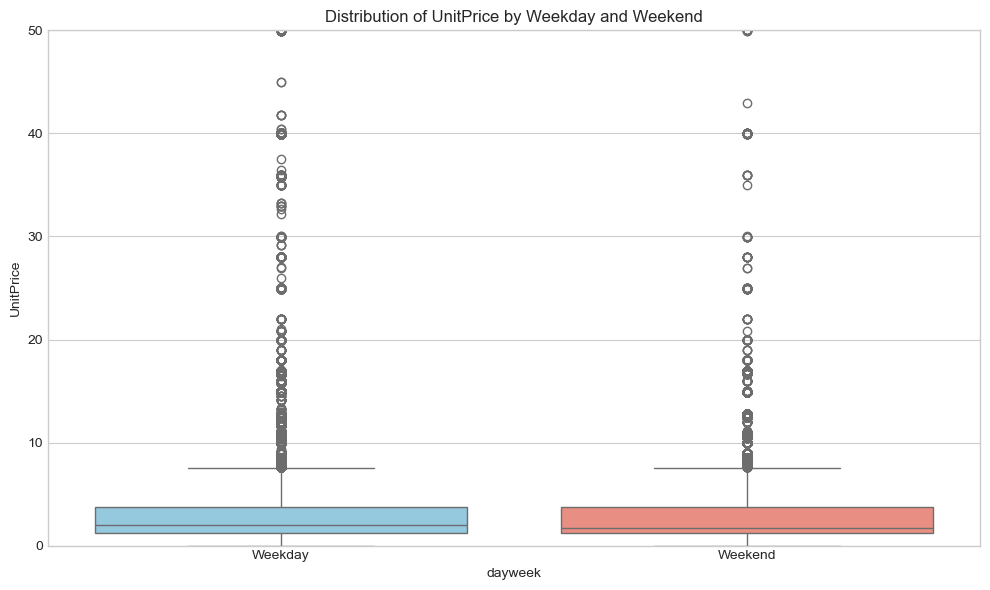

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='dayweek', y='UnitPrice', data=df, palette={'Weekday': 'skyblue', 'Weekend': 'salmon'})
plt.title('Distribution of UnitPrice by Weekday and Weekend')
plt.xlabel('dayweek')
plt.ylabel('UnitPrice')
plt.ylim(0, 50) 
plt.tight_layout()
plt.savefig('boxplot_unitprice.png')

In [53]:
# box-plot
# 주중과 주말의 50%선을 보면 하방으로 치우쳐진 상태이다. 즉 단위당 가격의 형태가 상당히 아래쪽으로 치우친 상태이다.
# 또한 두 값의 법위에서 아웃라이어가 과도하게 분포하는 평태로 보인다. 

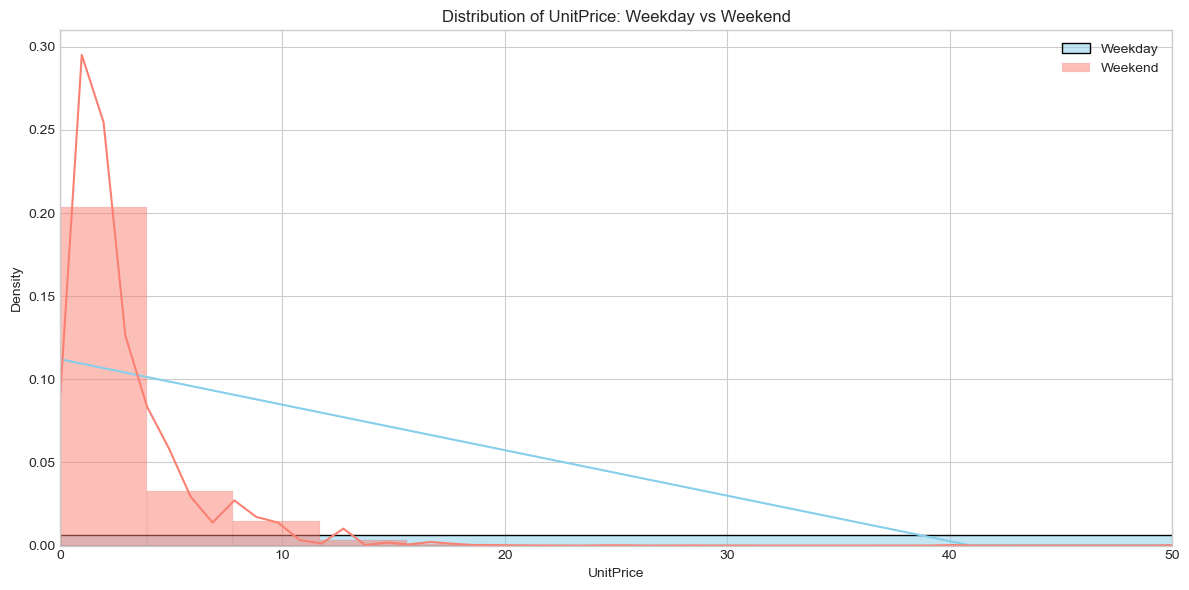

In [54]:
plt.figure(figsize=(12, 6))
sns.histplot(weekday_prices, kde=True, color='skyblue', label='Weekday', stat="density", bins=50)
sns.histplot(weekend_prices, kde=True, color='salmon', label='Weekend', stat="density", bins=50)
plt.title('Distribution of UnitPrice: Weekday vs Weekend')
plt.xlabel('UnitPrice')
plt.ylabel('Density')
plt.legend()
plt.xlim(0, 50) # Set x-limit for better comparison
plt.tight_layout()


In [55]:
# 히스토그램 해석
# 박스플롯에서 본 봐와 같이 히스트그램 상으로도 단위당 가격의 범위(10이하)가 저가에 치우친 형태를 보인다. 
# 하지만 범주상으로 보면 아웃라이어의 범위가 과도한 것으로도 보아 고가의 제품도 판매되는 경우도 많다는 것이다. 
# 즉 정규성보다는 한쪽으로 치우친 왜도를 가진다는 것이다. 또한 주중과 주말을 구분며면 저가의 제품이 주류를 이루지만, 
# 주말의 경우에는 고가의 제품 판매가 많은 것을 볼 수 있음.

In [56]:
# 4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.
# 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.
# 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
# 종속변수: 판매 수량(Quantity)
# 독립변수: 상품 단가(UnitPrice), 판매 국가(Country), 판매 요일(DayOfWeek), 판매 월( InvoiceMonth)
# 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

In [57]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder


In [58]:
df = df[['Quantity', 'UnitPrice', 'Country', 'InvoiceDate']]
# 필요 컬럼 선택

In [59]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['InvoiceMonth'] = df['InvoiceDate'].dt.month

# 날짜 정보를 분류

In [60]:
df.dropna(inplace=True)


In [61]:
#이상값 제거
df = df[(df['Quantity'] > 0) & (df['Quantity'] < df['Quantity'].quantile(0.99))]



In [62]:
# 원핫코딩
df_encoded = pd.get_dummies(df, columns=['Country', 'DayOfWeek'], drop_first=True)


In [63]:
X = df_encoded.drop(columns=['Quantity', 'InvoiceDate'])
y = df_encoded['Quantity']
#종속,독립변수 선

In [64]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [66]:
# 예측 및 평가
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
X = sm.add_constant(X)

In [70]:
# 회귀계수 출력
# coefficients = pd.Series(model.coef_, index=X.columns)
# print("회귀계수:")
# print(coefficients.sort_values(ascending=False))
print(f"예측된 y 값: {y_pred.round(2)}")
print(f"실제 y 값: {y_test}")
print(f"모델의 R-squared 값: {r2:.4f}")

예측된 y 값: [10.03  9.68 10.53 ... 10.43  8.69  9.72]
실제 y 값: 340691    24
344506    48
43735     24
138006     3
311153     8
          ..
236941     1
482096     5
56113      3
526472    24
310802     1
Name: Quantity, Length: 77627, dtype: int64
모델의 R-squared 값: 0.0638


In [ ]:
# 일반적인 결정계수의 값은 07, 0.7~ 0.3 그리고 그 이하로 구분할 수 있다. 즉 값의 크기가 클 수록 유의석이 있다는 의미이다. 
# 본 결과는 0.0638로 0.3보다 작기 때문에 종속변수를 잘 설명할 수 없다는 의미거나 예측할 수 없다는 것을 의미한다. 
# 즉 설명력이 없다는 것이다

In [71]:
# 조정된 R² 계산
n = X_test.shape[0]  # 샘플 수
p = X_test.shape[1]  # 독립변수 수
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))



In [72]:
print(f"Adjusted R²: {adjusted_r2:.4f}")


Adjusted R²: 0.0633


In [ ]:
# 이를 보편적으로 사용되는 조정 R^2값을 분석하여 보다도 기존이 값과 유사하기 때문에 설명력이 없다는 것을 알 수 있다.

In [ ]:
5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.
필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.
Quantity 피쳐를 활용해 IsReturn 피쳐를 생성하세요.
모델 학습에 사용할 적절한 피쳐를 선정하세요.
모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
IsReturn을 예측하는 로지스틱 회귀 모델을 학습하세요.
혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.